# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `Abhishek Garg....................`

Roll Number: `.22BM6JP03...................`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [24]:
import torch
import torch.nn as nn
import random
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

import matplotlib.pyplot as plt


## Add any other imports here

In [6]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Getting the data

In [3]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [8]:
# Model A Definition 

class netrelu(nn.Module):
  def __init__(self):
    super(netrelu,self).__init__()
    self.linear1 = nn.Linear(28*28,64)
    self.linear2 = nn.Linear(64,128)
    self.linear3 = nn.Linear(128,10)

# Prediction
  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = torch.relu(self.linear1(x))  
    x = torch.relu(self.linear2(x))
    x = self.linear3(x)
    return x

# Fill in appropriately while maintaining the name of the variable
modelA = netrelu()

### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [9]:
# Model B Definiton

class netrelu2(nn.Module):
  def __init__(self):
    super(netrelu2,self).__init__()
    self.linear1 = nn.Linear(28*28,64)
    self.linear2 = nn.Linear(64,128)
    self.linear3 = nn.Linear(128,256)
    self.linear4 = nn.Linear(256,10)

# Prediction
  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = torch.relu(self.linear1(x))  
    x = torch.relu(self.linear2(x))
    x = torch.relu(self.linear3(x))
    x = self.linear4(x)
    return x
# Use the same variable name
modelB = netrelu2()

### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [11]:
# Model C Definition

class netrelu3(nn.Module):
  def __init__(self):
    super(netrelu3,self).__init__()
    self.linear1 = nn.Linear(28*28,64)
    self.linear2 = nn.Linear(64,128)
    self.linear3 = nn.Linear(128,256)
    self.linear4 = nn.Linear(256,512)
    self.linear5 = nn.Linear(512,10)

# Prediction
  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = torch.relu(self.linear1(x))  
    x = torch.relu(self.linear2(x))
    x = torch.relu(self.linear3(x))
    x = torch.relu(self.linear4(x))
    x = self.linear5(x)
    return x

# Use the same variable name
modelC = netrelu3()

## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [21]:
# Use the same variable names

criterion = nn.CrossEntropyLoss()
model = netrelu()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [20]:
# Define the hyperparameters (same for all 3 models) here
learning_rate =0.5
num_epochs = 10


### Model A 



In [22]:
# Training Loop for model A

iteration_train_losses = []
iteration_valid_losses = []

# Losses per epoch
epoch_losses_train = []
epoch_losses_valid = []

for epoch in range(num_epochs):
    runningLoss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits)
        outputs = model(inputs)

        # Calculate Loss: binary cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        runningLoss += loss.item()

        iteration_train_losses.append(loss.item())

        # Updating parameters
        optimizer.step()

  
    epoch_losses_train.append(runningLoss / len(train_loader))

    # Validation Loss after every epoch
    runningLossValid = 0
    with torch.no_grad():
      for i, (inputs, labels) in enumerate(val_loader):
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          runningLossValid += loss.item()
          iteration_valid_losses.append(loss.item())
      epoch_losses_valid.append(runningLossValid / len(val_loader))
      
    print(f"Epoch {epoch:3}. Training Loss: {epoch_losses_train[-1]:.6f},  Validation Loss: {epoch_losses_valid[-1]:.6f}")



Epoch   0. Training Loss: 8.532523,  Validation Loss: 2.338137
Epoch   1. Training Loss: 2.339395,  Validation Loss: 2.342028
Epoch   2. Training Loss: 2.341969,  Validation Loss: 2.331751
Epoch   3. Training Loss: 2.343045,  Validation Loss: 2.350224
Epoch   4. Training Loss: 2.337938,  Validation Loss: 2.319258
Epoch   5. Training Loss: 2.342104,  Validation Loss: 2.333342
Epoch   6. Training Loss: 2.341497,  Validation Loss: 2.348332
Epoch   7. Training Loss: 2.343965,  Validation Loss: 2.369963
Epoch   8. Training Loss: 2.338446,  Validation Loss: 2.331605
Epoch   9. Training Loss: 2.340529,  Validation Loss: 2.371265


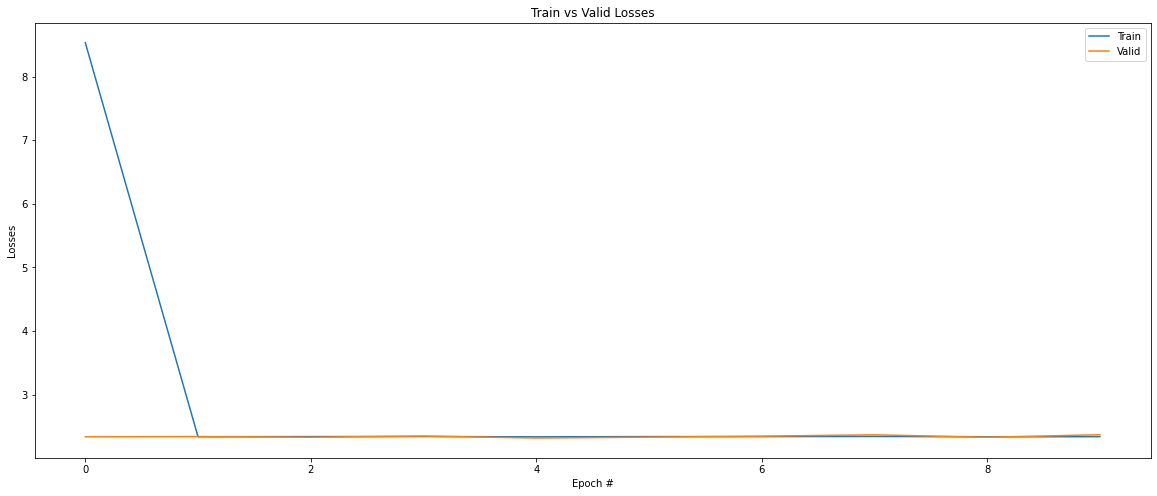

In [25]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_losses_train)
plt.plot(epoch_losses_valid)
plt.xlabel('Epoch #')
plt.ylabel('Losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')
plt.show()

In [ ]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A

### Model B


In [ ]:
# Training Loop for model B

In [ ]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B

In [ ]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B

### Model C


In [ ]:
# Training Loop for model C

In [ ]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C

In [ ]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [ ]:
# Leaky ReLU model definiton

# Tanh model definition


# Maintain these variable names
model_lrelu = ...
model_tanh = ...

### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [ ]:
# Training Loop for LRELU

In [ ]:
# Training Loop for TanH

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [ ]:
# Define how to calculate Accuracy on Test Set

In [ ]:
# Accuracy of RELU model

In [ ]:
# Accuracy of TanH model

In [ ]:
# Accuracy of LeakyReLU model

Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `....` %
* TanH model Test Set Accuracy: `....` %
* LeakReLU model Test Set Accuracy: `....` %